# Домашняя работа №2

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import math

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline

### Задание 1

Посчитайте 1-ую и 2-ую производные функции (на бумажке и в коде):

$f(x) = sin^2(2x+1)$


In [79]:
from scipy.misc import derivative
from math import cos, sin

In [80]:
from sympy import *

In [83]:
x = symbols('x')

In [84]:
# первая производная
f1 = diff(sin(2 * x + 1)**2)
f1

4*sin(2*x + 1)*cos(2*x + 1)

In [85]:
# вторая производная
f2 = diff(sin(2 * x + 1)**2, x, 2)
f2

8*(-sin(2*x + 1)**2 + cos(2*x + 1)**2)

Графическая интерпретация:

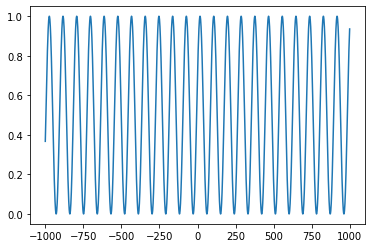

In [87]:
x = np.array([i for i in range(-1000, 1000)])
y = np.array([math.sin(2 * math.radians(x_i) + 1)**2 for x_i in x])
plt.plot(x, y)

Вычисление первой производной

In [88]:
list_der_sin = []
for i in range(len(x)-1):
    list_der_sin.append((y[i+1]-y[i])/(x[i+1]-x[i]))
list_der_sin.append(list_der_sin[-1])

Вычисление второй производной

In [89]:
list_second_der_sin = []
for i in range(len(x)-1):
    list_second_der_sin.append((list_der_sin[i+1]-list_der_sin[i])/(x[i+1]-x[i]))
list_second_der_sin.append(list_second_der_sin[-1])

Первая и вторая производные - графическая интерпретация

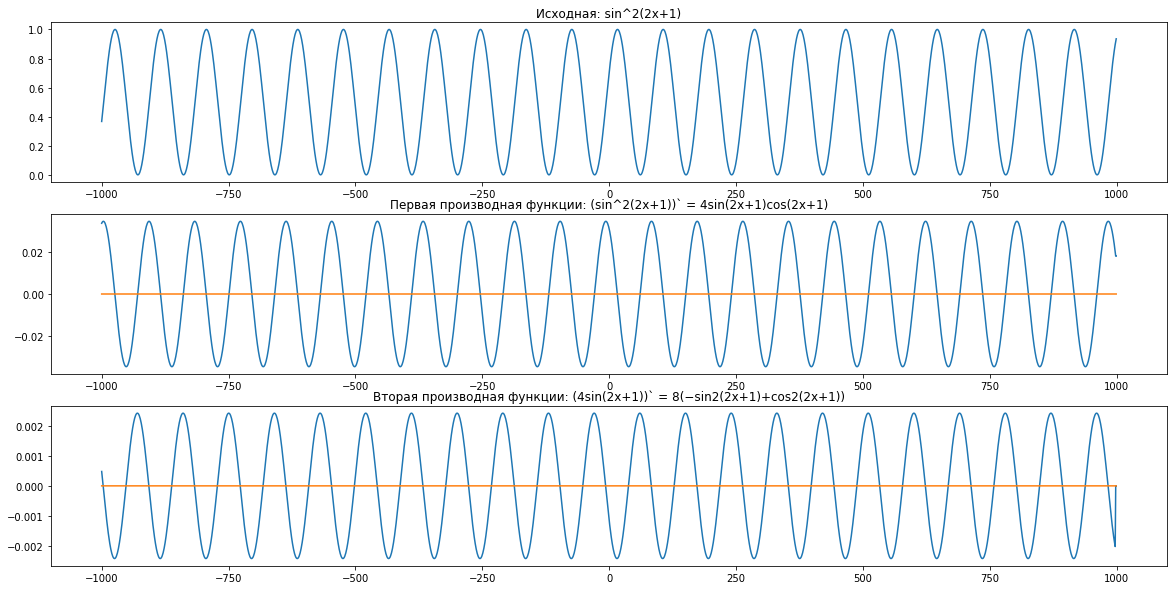

In [91]:
fig, axs = plt.subplots(3,figsize=(20,10))
axs[0].set_title('Исходная: sin^2(2x+1)')
axs[0].plot(x, y)
axs[1].set_title('Первая производная функции: (sin^2(2x+1))` = 4sin(2x+1)cos(2x+1)')
axs[1].plot(x, list_der_sin)
axs[1].plot(x, [0 for i in range(len(list_der_sin))], '-')
axs[2].set_title('Вторая производная функции: (4sin(2x+1))` = 8(−sin2(2x+1)+cos2(2x+1))')
axs[2].plot(x, list_second_der_sin)
axs[2].plot(x, [0 for i in range(len(list_der_sin))], '-')

### Задание 2: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

In [1]:
from sympy import *

In [2]:
x, y = symbols('x y')

In [3]:
# частная производная по x
diff(2 * x**2 * y**3 + 1 / x + y**2 *x + 7, x)

4*x*y**3 + y**2 - 1/x**2

In [4]:
# частная производная по y
diff(2 * x**2 * y**3 + 1 / x + y**2 *x + 7, y)

6*x**2*y**2 + 2*x*y

In [33]:
def func(x):
    "Coordinate vector `x` should be an array of size two."
    return 2 * x[0]**2 * x[1]**3 + 1 / x[0] + x[1]**2 * x[0] + 7

In [34]:
x = (1, 2)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps])

array([35.00000024, 28.00000024])

### Задание 3

Найти точки минимума в следующих данных (колонка height):

In [39]:
import pandas as pd
data = pd.read_csv('video.csv')
data.head()

,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


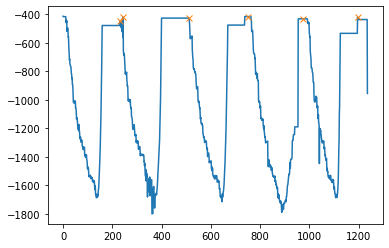

In [40]:
# "перевернули" height
peaks, _ = find_peaks(-data.height, prominence=1, width=20)
plt.plot(-data.height)
plt.plot(peaks, -data.height[peaks], "x")
plt.show()